# Assignment 1: Derek Pyne

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

First let's import the data

In [2]:
df = pd.read_csv('mosquitos_data.csv')
df.head()

,Response,Treatment
0,27,Beer
1,20,Beer
2,21,Beer
3,26,Beer
4,27,Beer


We can now make a boxplot grouping by the two treatment types. We can see that the beer consumption group seems to be significantly more attractive to mosquitos. On average, the beer group attracted ~4 more mosquitos.

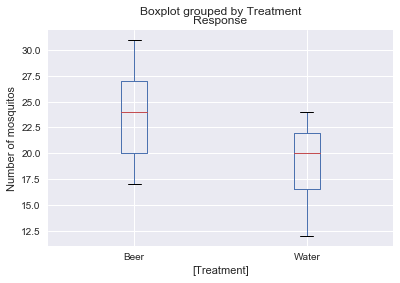

In [3]:
df.boxplot(by='Treatment')
plt.ylabel('Number of mosquitos')

We can calculate some basic statistics on these groups as well. We see a higher average in our beer group as well as a larger spread.

In [4]:
simple_stats = df.groupby('Treatment').describe()['Response']
simple_stats

,count,mean,std,min,25%,50%,75%,max
Treatment,,,,,,,,
Beer,25.0,23.600000,4.133199,17.0,20.0,24.0,27.0,31.0
Water,18.0,19.222222,3.671120,12.0,16.5,20.0,22.0,24.0


In [5]:
exp_mean_diff = abs(simple_stats['mean'].diff().iloc[1])
print("Difference in mean value: %0.2f" % exp_mean_diff)

Difference in mean value: 4.38


Let's now simulate the probability of observing a difference in the mean value this large by shuffling the data into two groups (of the same sizes as before), and calculating the difference in means between these groups.

In [6]:
all_vals = df['Response'].values

In [7]:
def shuffleAndMeanDiff():
    np.random.shuffle(all_vals)
    beer_group = all_vals[:int(simple_stats.loc['Beer','count'])]
    water_group = all_vals[int(simple_stats.loc['Beer','count']):]
    return beer_group.mean() - water_group.mean()
mean_diffs = [shuffleAndMeanDiff() for _ in range(10000)]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10c30bd68>]], dtype=object)

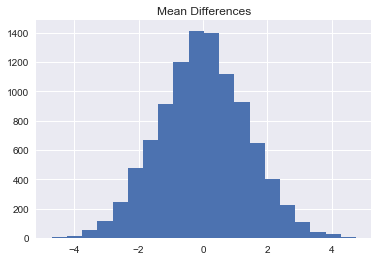

In [8]:
pd.DataFrame({'Mean Differences': mean_diffs}).hist(bins=20)

In [9]:
prob_mean_greater = sum((mean_diffs > exp_mean_diff) | (mean_diffs < -exp_mean_diff)) / len(mean_diffs) * 100
print("Probability of a mean diff greater then our experimental value: %0.3f%%" % prob_mean_greater)

Probability of a mean diff greater then our experimental value: 0.090%


We can see that the probability of beer having no effect on mosquito attractiveness is extremely unlikely.